## CAR EVALUATION DATASET

Importing dataset

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
data = '/content/car_evaluation.csv'

df = pd.read_csv(data, header=None)

Exploratory data analysis

In [6]:
# view dimensions of dataset
df.shape

(1728, 7)

In [7]:
# preview the dataset
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Rename column names

---


We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows

In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [9]:
# let's again preview the dataset
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Frequency distribution of values in variables

In [11]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:

    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


Summary of variables

There are 7 variables in the dataset. All the variables are of categorical data type.
These are given by buying, maint, doors, persons, lug_boot, safety and class.
class is the target variable.

In [12]:
df['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


In [13]:
# check missing values in variables
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


We can see that there are no missing values in the dataset. we have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

 Declare feature vector and target variable

In [14]:
X = df.drop(['class'], axis=1)

y = df['class']

Split data into separate training and test set

In [15]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [16]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (571, 6))

 Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. we will carry out feature engineering on different types of variables.

First, we will check the data types of variables again.

In [17]:
X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


Encode categorical variables

Now, we will encode the categorical variables

In [18]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [19]:
!pip install category_encoders
# import category encoders
import category_encoders as ce

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.3 MB/s eta 0:00:00


In [20]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [21]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


We now have training and test set ready for model building.

Random Forest Classifier model with default parameters

In [34]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9264


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

Here, we have build the Random Forest Classifier model with default parameter of n_estimators = 10. So, we have used 10 decision-trees to build the model. Now, we will increase the number of decision-trees and see its effect on accuracy.

Random Forest Classifier model with parameter n_estimators=200

In [54]:
# instantiate the classifier with n_estimators = 200

rfc_200 = RandomForestClassifier(n_estimators=200, random_state=0)

# fit the model to the training set

rfc_200.fit(X_train, y_train)

# Predict on the test set results

y_pred_200 = rfc_200.predict(X_test)

# Check accuracy score

print('Model accuracy score with 200 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_200)))

Model accuracy score with 200 decision-trees : 0.9335


Find important features with Random Forest model

Until now, we have used all the features given in the model. Now, we will select only the important features, build the model using these features and see its effect on accuracy.

First, we will create the Random Forest model as follows

In [52]:
# create the classifier with n_estimators = 200

clf = RandomForestClassifier(n_estimators=200, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=200, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

Now, we will use the feature importance variable to see feature importance scores

In [25]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

,0
safety,0.295319
persons,0.233856
buying,0.151734
maint,0.146653
lug_boot,0.100048
doors,0.072389


We can see that the most important feature is safety and least important feature is doors

Visualize feature scores of the features

Now, we will visualize the feature scores with matplotlib and seaborn.

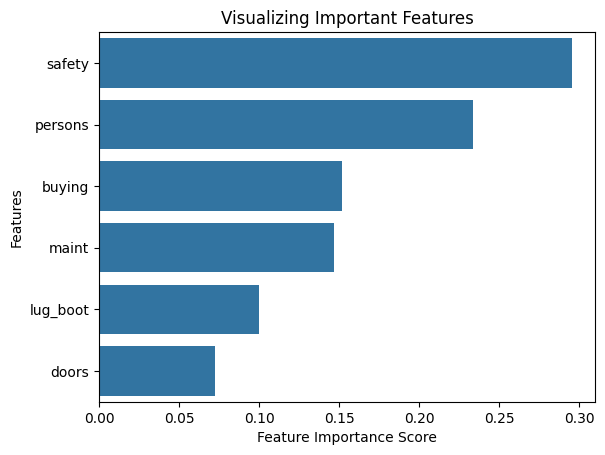

In [26]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

Build Random Forest model on selected features

Now, we will drop the least important feature doors from the model, rebuild the model and check its effect on accuracy

In [40]:
# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)
y = df['class']

In [41]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Now, we will build the random forest model and check accuracy

In [42]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [53]:
# instantiate the classifier with n_estimators = 200

clf = RandomForestClassifier(random_state=0)


# fit the model to the training set

clf.fit(X_train, y_train)

# Predict on the test set results

y_pred = clf.predict(X_test)

# Check accuracy score

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9264


we have removed the doors variable from the model, rebuild it and checked its accuracy. The accuracy of the model with doors variable removed is 0.9264. The accuracy of the model with all the variables taken into account is 0.9247.

Furthermore, the second least important model is lug_boot. If we remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, we will not drop it from the model.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

Confusion matrix

In [31]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. we have described these terms in later.

We can print a classification report as follows

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571



Results and conclusion

1. In this project, we build a Random Forest Classifier to predict the safety of the car. we build two models, one with 10 decision-trees and another one with 200 decision-trees.
2. The model accuracy score with 10 decision-trees is 0.9264 but the same with 100 decision-trees is  0.9335. So, as expected accuracy increases with number of decision-trees in the model.
3. We have used the Random Forest model to find only the important features, build the model using these features and see its effect on accuracy. The most important feature is safety and least important feature is doors.
4. we have removed the doors variable from the model, rebuild it and checked its accuracy. The accuracy of the model with doors variable removed is 0.9264. The accuracy of the model with all the variables taken into account is 0.9335. So, we can see that the model accuracy has been dropped with doors variable removed from the model. So, we will not drop it from the model.
5. The second least important model is lug_boot. If we remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, we will not drop it from the model.
6. Confusion matrix and classification report are another tool
to visualize the model performance. They yield good performance.